In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash

In [2]:
df = pd.read_csv('data/projectregister.csv', encoding='ISO-8859-1')

#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 60 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Project Proponent                                                                                                      2009 non-null   object 
 1   Project Name                                                                                                           2009 non-null   object 
 2   Project ID                                                                                                             2009 non-null   object 
 3   Method                                                                                                                 2009 non-null   object 
 4   

In [3]:

df['Method'] = df['Method'].astype(str)
df['Method'] = df['Method'].str.replace('Carbon Credits (Carbon Farming Initiative', '', regex=False)
df['Method'] = df['Method'].str[2:-32]




print(df['Method'].value_counts())



Method
(Human-Induced Regeneration of a Permanent Even-Aged Native Forest -1.1                                                                             511
Estimation of Soil Organic Carbon Sequestration using Measurement and Models                                                                        295
(Reforestation by Environmental or Mallee Plantings -FullCAM                                                                                        188
Measurement of Soil Carbon Sequestration in Agricultural Systems                                                                                    153
Landfill Gas                                                                                                                                         87
Plantation Forestry                                                                                                                                  87
Emissions Abatement through Savanna Fire Management                              

In [4]:
# Step 1: Get the value counts
value_counts = df['Method'].value_counts()

# Step 2: Determine which values to drop
# For example, drop values that occur less than 10 times
values_to_drop = value_counts[value_counts < 10].index

# Step 3: Drop the rows that contain those values
df_filtered = df[~df['Method'].isin(values_to_drop)]


this is a comment

In [5]:
#print(df['Method'].describe())
#print(df['Method Type'].value_counts())

df_filtered['ACCUs Total units issued'] = df_filtered['ACCUs Total units issued'].str.replace(',', '').astype(float)
print(df_filtered['ACCUs Total units issued'].value_counts())

ACCUs Total units issued
0.0         1302
5080.0         2
291133.0       1
99196.0        1
257231.0       1
            ... 
133963.0       1
48433.0        1
285285.0       1
15439.0        1
243942.0       1
Name: count, Length: 614, dtype: int64


/tmp/ipykernel_1942/461315904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ACCUs Total units issued'] = df_filtered['ACCUs Total units issued'].str.replace(',', '').astype(float)


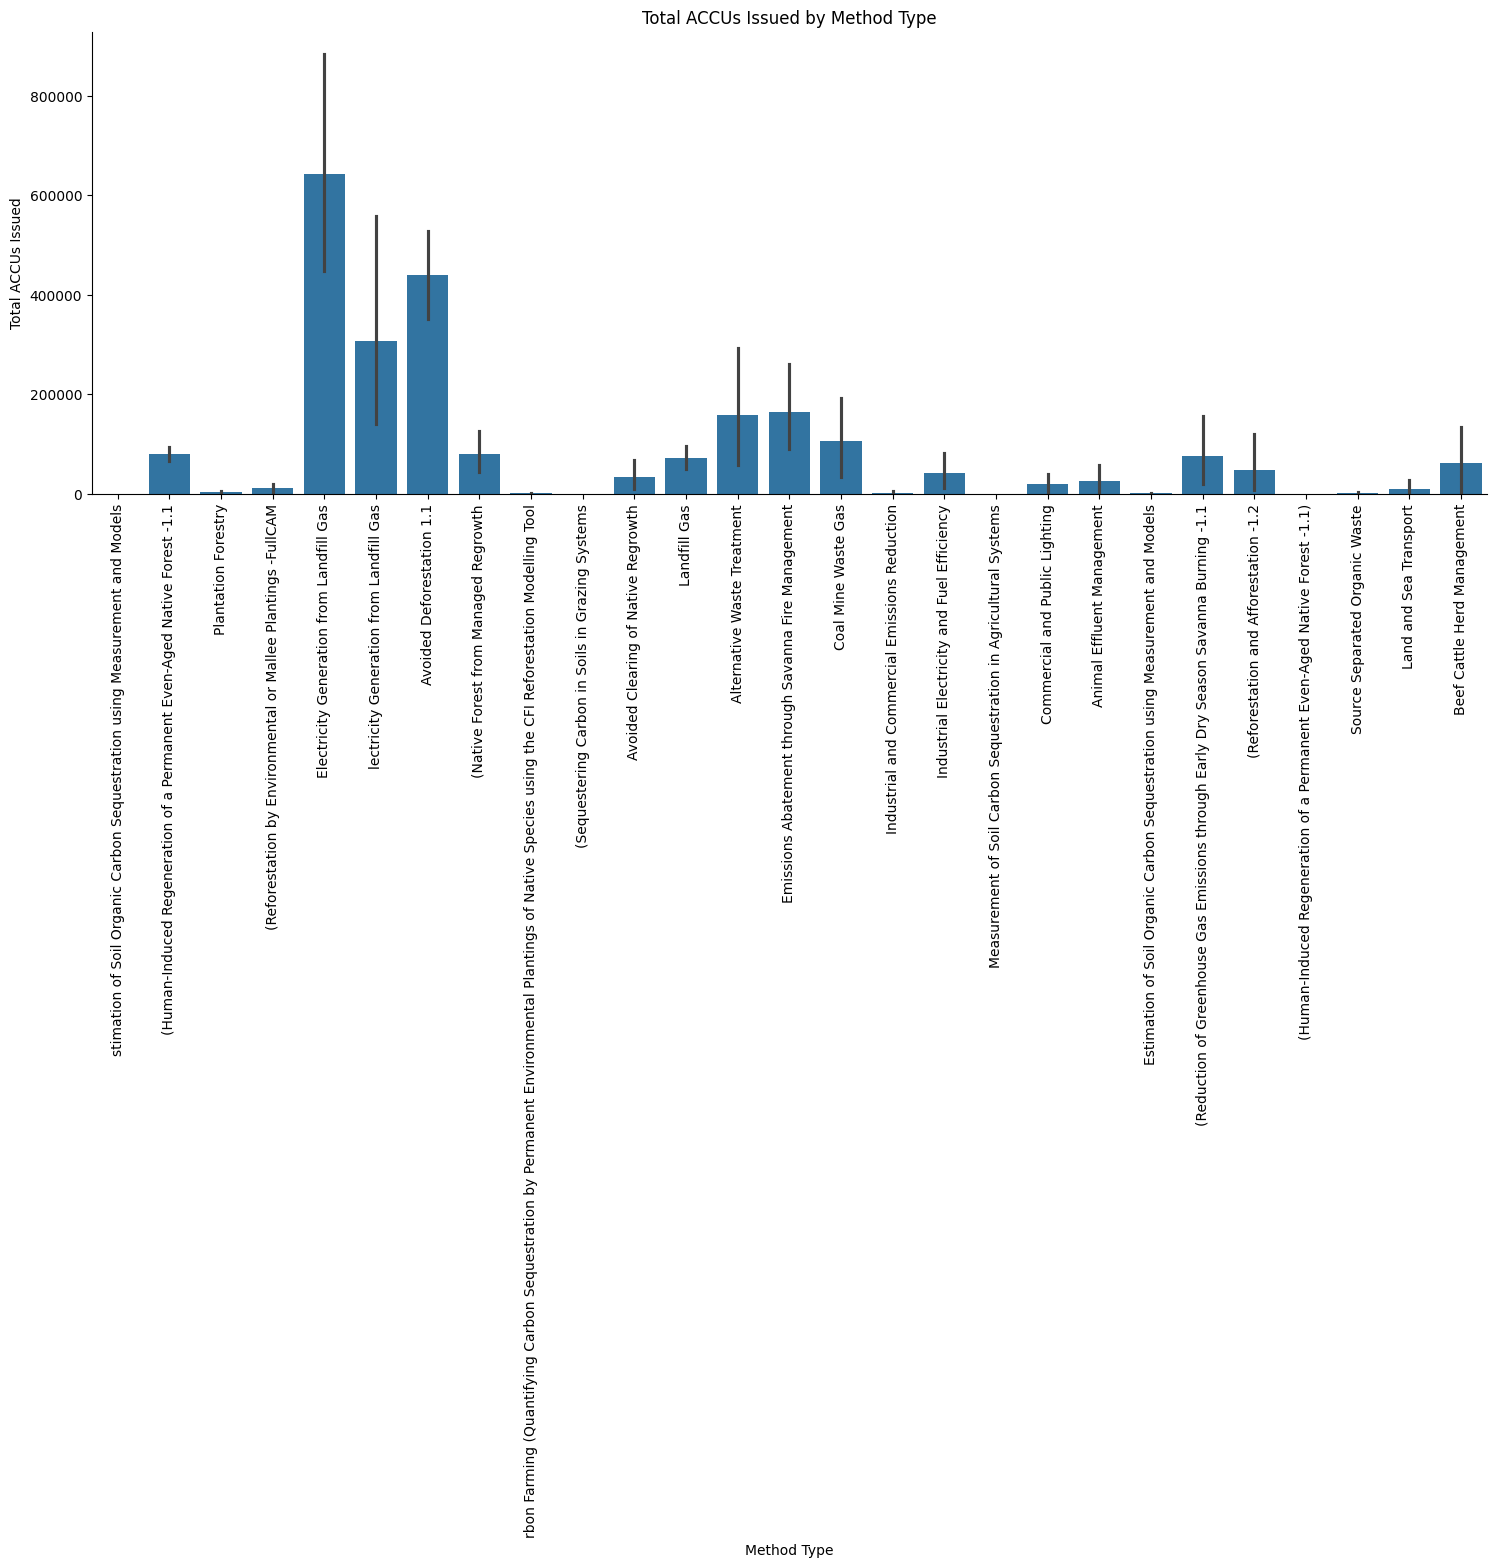

In [6]:
plt.figure(figsize=(18,6))  # Adjust the size as needed
ax = sns.barplot(x='Method', y='ACCUs Total units issued', data=df_filtered)

#plt.tight_layout()
plt.xticks(rotation=90)
#.set_context('talk')
sns.set_style('whitegrid')
sns.despine()

plt.title('Total ACCUs Issued by Method Type')
plt.xlabel('Method Type')
plt.ylabel('Total ACCUs Issued')

plt.show()

